# The t-Distribution <hr style="border:2.5px solid #800080"></hr>

Data Analyst: Claire Jaud <br>
Department: Electrical Engineering

In [6]:
# imports and packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy import stats 

In [7]:
# load dataset
df = pd.read_csv(r"transformer-voltage-10-sample.csv", delimiter=",")
df

,Sample,Voltage
0,1,120.2
1,2,94.4
2,3,119.9
3,4,120.1
4,5,120.2
5,6,120.4
6,7,120.3
7,8,119.8
8,9,120.1
9,10,139.0


In [8]:
# summary of dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   10 non-null     int64  
 1   Voltage  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


In [9]:
# summary statistics
df.describe()

,Sample,Voltage
count,10.00000,10.000000
mean,5.50000,119.440000
std,3.02765,10.612487
min,1.00000,94.400000
25%,3.25000,119.950000
50%,5.50000,120.150000
75%,7.75000,120.275000
max,10.00000,139.000000


In [10]:
# t-critical of two-tailed test
alpha = 0.05
dof = df['Voltage'].count() - 1

t_critical = stats.t.ppf(1 - alpha/2, dof)
t_critical 

np.float64(2.2621571628540993)

In [11]:
# confidence interval
ci_lower, ci_upper = stats.t.interval( confidence=0.95,
                                       df = df['Voltage'].count() - 1,
                                       loc = df['Voltage'].mean(),
                                         scale = df['Voltage'].std(ddof=1) / np.sqrt(df['Voltage'].count()))

In [12]:
ci_lower

np.float64(111.8482838462108)

In [13]:
ci_upper

np.float64(127.03171615378922)

In [14]:
print("Confidence Interval = " + str(round(ci_lower, 2)) + "," + str(round(ci_upper, 2)) )

Confidence Interval = 111.85,127.03


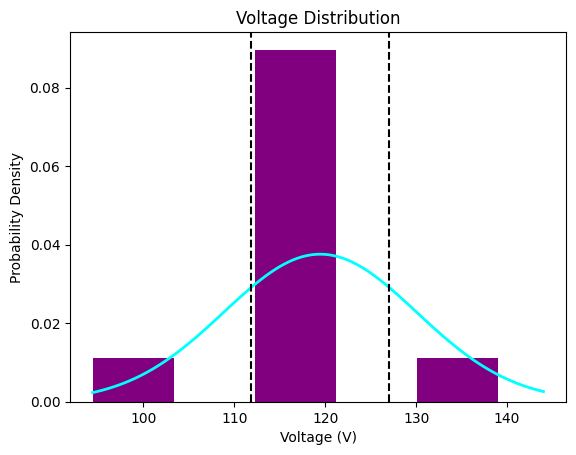

In [15]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis 
x_min = df['Voltage'].min()
x_max = df['Voltage'].max() + 5

# normal distribution
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x,p,linewidth=2, color = "Cyan")

# histogram 
plt.hist(df['Voltage'], bins=5, density=True, color = "Purple")
plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# confidence interval
plt.axvline(ci_lower,color='k',linestyle='--')
plt.axvline(ci_upper,color='k',linestyle='--')
plt.show()